# **Topic: Linear Regression**
### Method Follow CRISP-DM
<!-- ![CRISP](https://www.datascience-pm.com/wp-content/uploads/2021/02/CRISP-DM.png) -->

<img src="https://www.datascience-pm.com/wp-content/uploads/2021/02/CRISP-DM.png" width=500>

## Step 1: Get Data 
* collect from sensors 
* read csv, xml
* Database
* web crawler (web, opendata)
* API (群益API) = Restful API (HTTP GET)
 
  Python 後端程式框架
  ==> flask, Django, fastapi, ASYN, swagger 文件






      x             y
0   680   8648.494704
1   161   2276.223519
2   321   4469.314024
3   175   2776.517896
4  1001  10214.141390
5   577   7232.675201
6   766   8976.655095
7    51    721.756475
8   445   5612.239108
9   452   4939.735901
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       156 non-null    int64  
 1   y       156 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.6 KB
None
                 x             y
count   156.000000    156.000000
mean    557.788462   6549.571669
std     299.342376   3002.645983
min       0.000000    721.756475
25%     318.750000   4142.973355
50%     560.000000   6507.179274
75%     813.250000   9207.855106
max    1021.000000  11770.797770


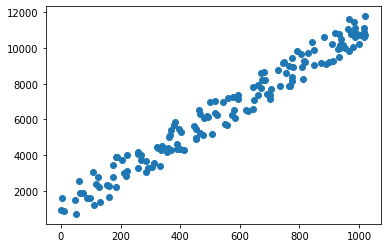

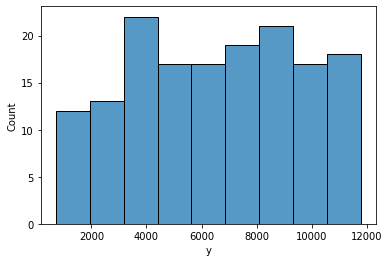

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
# Data Viz tool (visualization)
# python matplotlib, seaborn, D3.js, plotly
# Google Data Studio, Tableau, Power BI 

data=pd.read_csv("dataN.csv")
print(data.head(10))
print(data.info())
print(data.describe())
plt.scatter(data.x,data.y)
plt.show()

sns.histplot(data.y)

#--------------practice----------
# data=pd.read_csv("data.csv")
# print(type(data))

# print(data.head())
# data.head(10)
# data.info()
# data.describe()
#-------------------------------



## Step 2: Prepoare X, Y
* data missing ==> imputation (插補)
* data normalization
* categorical data ==> onehot encoding
* data format for different package
 example (python <-> numpy <-> sklearn)
* data augmentation 

In [9]:
print(data.columns)
print(data.index)

# X=data.x.values.reshape(-1,1)
# Y=data['y'].values.reshape(-1,1)

X=data.iloc[:,:-1].values.reshape(-1,1)
Y=data.iloc[:,-1].values.reshape(-1,1)




print(type(X),X.shape)
print(type(Y),Y.shape)
data2=data.values
print(type(data2),data2.shape)

Index(['x', 'y'], dtype='object')
RangeIndex(start=0, stop=156, step=1)
<class 'numpy.ndarray'> (156, 1)
<class 'numpy.ndarray'> (156, 1)
<class 'numpy.ndarray'> (156, 2)


## Step 3: Select Model
<img src="https://miro.medium.com/max/720/1*q0COC8-Q0vOnuKSaENwivg.png" width=500>


Lasso(alpha=0.1)
a= 5 b= 5


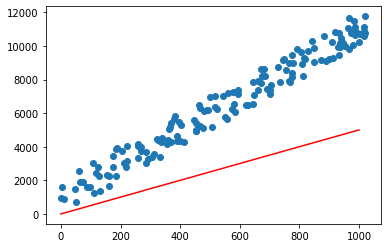

a= 9.850822921708438 b= 1054.8963061470522


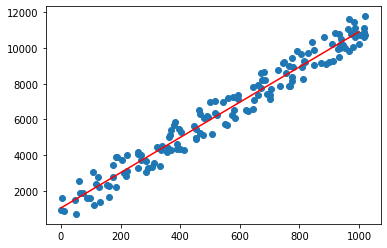

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR
from sklearn import linear_model

# model selection
# using Lasso model
model = linear_model.Lasso(alpha=0.1)

# using Linear Regression
# model =LR()

print(model)
model.fit(X,Y)

# y=ax+b
a= float(model.coef_)
b=float(model.intercept_)




def plotmodel(a=5,b=5):
  print("a=",a,"b=",b)
  xm=np.array([0,1000])
  ym=a*xm+b
  plt.scatter(X,Y)
  plt.plot(xm,ym,'r')
  plt.show()

plotmodel()
plotmodel(a,b)

## Step 4: Evaluate Model Performance

* Mean Square Error
* Mean Absolute Error
* R-square

In [22]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
y_true =Y
y_pred = model.predict(X)
r2=r2_score(y_true, y_pred)
mse=mean_squared_error(y_true, y_pred)
mae=mean_absolute_error(y_true, y_pred)

print("r2=",r2)
print("mse=",mse)
print("mae=",mae)



r2= 0.9644356706862087
mse= 318588.419305615
mae= 488.18219921534165


## Step 5: Deploy Prediction

* purpose => 將 AI model push to deployment 


In [23]:
data['preY']=y_pred
print(data.head())

      x             y          preY
0   680   8648.494704   7753.455893
1   161   2276.223519   2640.878797
2   321   4469.314024   4217.010464
3   175   2776.517896   2778.790317
4  1001  10214.141390  10915.570051


In [24]:
# DataFrame write to csv 
data.to_csv("result.csv",index=False, mode='w')
